#### Importação de libs

In [1]:
!pip install pulp
!pip install latexify-py
import math
import latexify
import pulp
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 7.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exercício 5

# Modelagem

### Quais as variáveis de decisão?

####`x1`=> Quantidade M1/dia
####`x2`=> Quantidade M2/dia

### Qual a função objetivo?
#### Maximizar Lucro total diário

*   Lucro de `x1 = 4`
*   Lucro de `x2 = 3`




In [2]:
@latexify.with_latex
def maxLucro(x1, x2):
  return 4*x1 + 3*x2
maxLucro 

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7f88c25fd790>

### Quais as restrições?

#### Restrições tecnicas e Restrições de negatividade

In [3]:
@latexify.with_latex
def restricoes(x1, x2):
  if 1:
    return ((2*x1 + x2) <= 1000)
  elif 2:
    return (x1 + x2 <= 800)
  elif 3:
    return (x1 <= 400)
  elif 4:
    return (x2 <= 700)     
  else:
    return (x2 and x1) >= 0

restricoes  

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7f88c2608ed0>

Observação: `if n` foi usado para indicar que é uma restrição, sendo `if` neste foi usado para indicar qual a restrição e `n` para indica a restrição.
O `otherwise` está sendo usado para indicar restrição de não negatividade
####**Restrições** 


*   Restrição volume produção => `if 1`
*   Restrição capacidade máxima produção devido couro => `if 2`
*   Restrição disponibilidade diária fivela para o modelo M1 => `if 3`
*   Restrição disponibilidade diária fivela para o modelo M2 => `if 4`
*   Restrição de não negatividade => `otherwise`



#Método gráfico
#### Achando os pontos
####### Observação inicializar 0 para as variaveis para encontrar o valor da outras


*   Inicializar 0 para as variaveis para encontrar o valor da outras variaveis
*   Equação da função objetivo encontramos o gradiente que está perpendicular a reta da solução

#### Restrição 2x1 + x2 = 1000

Quando x1=0 então x2=?

2(0) + x2 = 1000
x2 = 1000

Quando x2=0 então x1=?
2x1 + (0) = 1000
2x1=1000

x1= 1000/2 = 500


#### Restrição x1 + x2 = 800

Quando x1=0 então x2=?
(0)+x2=800
x2=800

Quando x2=0 então x1=?
x1+(0)=800
x1=800

#### Restrição x1=400

#### Restrição x2 = 700


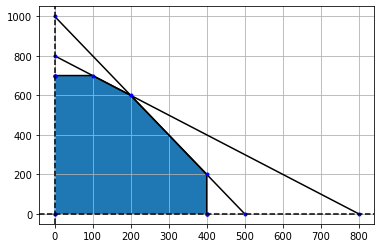

In [4]:
# [x1, y1]
ponto_o = [0, 0] # z = 0
plt.plot(ponto_o)

# Dados retas  

list_values = []
list_values.append([[0, 500], [1000, 0]])
list_values.append([[0, 800], [800, 0]])
list_values.append([[400, 400], [0, 1]])
list_values.append([[0, 1], [700, 700]])

area_de_solucao = [[400, 400, 200, 100, 0], [0, 200, 600, 700, 700]]
list_values.append(area_de_solucao)


def plot_pontos(x1, x2, color):
  plt.plot(x1, x2, color=color)

for x in list_values:
  plot_pontos(x[0], x[1], color='black')
  plt.plot(x[0], x[1], 'b.')
  
plt.fill_between(area_de_solucao[0], area_de_solucao[1])

plt.plot(ponto_o, ponto_o, 'b.')


#plt.legend(['Reta 0'], loc=9)

plt.grid(True)
plt.axvline(0, c='black', ls='--')
plt.axhline(0, c='black', ls='--')
plt.show()


# Progrmação

In [5]:
# Definir o modelo
model = pulp.LpProblem('Lista 1 - Exercicio 5', sense=pulp.LpMaximize)

# Adicionar as variáveis
x = pulp.LpVariable.dicts(indices=[1, 2], cat=pulp.LpContinuous, lowBound=0, name='x')

# Adicionar as Restruições
model.addConstraint(2*x[1] + x[2] <= 1000, name='restricao_1')
model.addConstraint(x[1] + x[2] <= 800, name='restricao_2')
model.addConstraint(x[1] <= 400, name='restricao_3')
model.addConstraint(x[2] <= 700, name='restricao_4')

# Função Objetivo
model.setObjective(4*x[1] + 3*x[2])

# Optimizar
model.solve()

# Obter e imprimir a solução
x_sol = {i: x[i].value() for i in [1, 2]}
print(f'x = {x_sol}')
z = 4*x_sol[1] + 3*x_sol[2]
print(f'z = {z}')

x = {1: 200.0, 2: 600.0}
z = 2600.0


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
